In [2]:
import pymysql

In [12]:
# 
# DB테이블 값 조회 (SELECT)
#
# MySQL Connection 연결
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')
 
try :
    with connection.cursor() as cursor :       # Connection 으로부터 Cursor 생성
        sql = "select * from stock_hye"           # SQL문 실행
        cursor.execute("set names utf8")
        cursor.execute(sql)
        result = cursor.fetchall()            # 데이터 fetch
        
        for i in result :
            print(i)
finally :
    # Connection 닫기
    connection.close()

In [23]:
# 
# DB테이블 값 삽입 (INSERT)
#
# MySQL Connection 연결
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')
try:
    with connection.cursor() as cursor:
        sql = 'INSERT INTO stock_hye (company_name, stock_price) VALUES (%s, %s) ON DUPLICATE KEY UPDATE stock_price = VALUES(stock_price)'
        cursor.execute(sql, ('samsung', 1200))          # 넣으려는 값
        sql = 'INSERT INTO stock_hye (company_name, stock_price) VALUES (%s, %s) ON DUPLICATE KEY UPDATE stock_price = VALUES(stock_price)'
        cursor.execute(sql, ('kakao', 12000))          # 넣으려는 값
    connection.commit()
    print(cursor.lastrowid)
    # 1 (last insert id)
    
finally:
    connection.close()

0


MySQL connection is closed


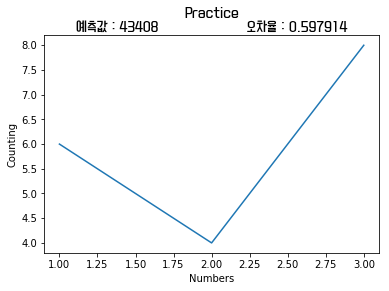

In [16]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import settings

connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:  
        sql = "select stock_price from stock_hye WHERE company_name='삼성'"
        
        cursor.execute("set names utf8")
        
        cursor.execute(sql)
        
        result_stock_price = cursor.fetchone()
        
        for i in result_stock_price:
            price = i
            
        sql = "select accuracy from stock_hye WHERE company_name='삼성'"
        
        cursor.execute("set names utf8")
        
        cursor.execute(sql)
        
        result_accuracy = cursor.fetchone()
        
        for i in result_accuracy:
            accuracy = i
            
finally:
    connection.close()
    print("MySQL connection is closed")

x = [1,2,3]
y = [6,4,8]


font_path = "C:/Windows/Fonts/a옛날목욕탕L.ttf"
fontprop = fm.FontProperties(fname=font_path, size=15)

#plt.ylabel('가격', fontproperties=fontprop)
#plt.figure()   
plt.plot(x, y)
plt.xlabel('Numbers')
plt.ylabel('Counting')

plt.title('Practice\n예측값 : %s \t\t\t\t\t\t\t오차율 : %s' % (price, accuracy), fontproperties=fontprop )

plt.savefig("./chart_picture/test.png",dpi=300)
plt.show()

In [71]:
import pymysql

#
# 사진 데이터 binary형식으로 바꿔서 DB에 INSERT
#
def convertToBinaryData(filename):
    #Convert digital data to binary format
    with open(filename, 'rb') as file:
        binaryData = file.read()
    return binaryData

connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = 'INSERT INTO stock_hye (company_name, stock_price, image) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE stock_price = VALUES(stock_price), image = VALUES(image)'
        image = convertToBinaryData("C:\source\SPF\chart_picture\kakao.png")
        cursor.execute(sql, ('kakao', 0, image))          # 넣으려는 값
    connection.commit()
    print(cursor.lastrowid)
    # 1 (last insert id)

finally:
    connection.close()

14


In [79]:
import pymysql
#
# DB에 저장된 binary를 이미지로 컴퓨터에 저장하기 (값이 잘 들어갔는지 확인)
#
def write_file(data, filename):
    # Convert binary data to proper format and write it on Hard Disk
    print(filename)
    with open(filename, 'wb') as file:
        file.write(data)
        
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = "select * from stock_hye where company_name = %s "
        cursor.execute(sql, ('kakao', ))
        record = cursor.fetchall()
        for row in record:
            print("company_name = ", row[1])
            image =  row[3]
            print("Storing employee image and bio-data on disk \n")
            write_file(image, r"C:\source\SPF\chart_picture\test\kakao_test.png")
    connection.commit()

    
finally:
    connection.close()
    print("MySQL connection is closed")

company_name =  b'kakao'
Storing employee image and bio-data on disk 

C:\source\SPF\chart_picture\test\kakao_test.png
MySQL connection is closed


In [80]:
import pymysql

def write_file(data, filename):
    # Convert binary data to proper format and write it on Hard Disk
    print(filename)
    with open(filename, 'wb') as file:
        file.write(data)
        
connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

try:
    with connection.cursor() as cursor:
        sql = "select * from stock_hye where company_name = %s "
        cursor.execute(sql, ('samsung', ))          # 넣으려는 값
        record = cursor.fetchall()
        for row in record:
            print("company_name = ", row[1])
            image =  row[3]
            print("Storing employee image and bio-data on disk \n")
            write_file(image, r"C:\source\SPF\chart_picture\test\samsung_test.png")
    connection.commit()

    
finally:
    connection.close()
    print("MySQL connection is closed")

company_name =  b'samsung'
Storing employee image and bio-data on disk 

C:\source\SPF\chart_picture\test\samsung_test.png
MySQL connection is closed


In [6]:
import pymysql
import os
import settings
import pandas as pd 

connection = pymysql.connect(host='222.122.86.187', port=3306, user='geniuses777', password='stock7840',
                       db='geniuses777', charset='utf8')

############################################ 상승률(하락률) 계산하기 ############################################

############################################ 삼성 ############################################
try:
    with connection.cursor() as cursor:  
        sql = "select stock_price from stock_hye WHERE company_name='삼성'"
        
        cursor.execute("set names utf8")
        
        cursor.execute(sql)
        
        result_stock_price = cursor.fetchone()
        
        for i in result_stock_price:
            price = i
         
        #
        # 저장되어있는 주식데이터 불러오기
        #
        sydtpath = os.path.join(settings.BASE_DIR, 'chart_data/%s' % (settings.get_today_str()))
        stock_code = "samsung"
        fullpath = sydtpath + os.path.sep + stock_code + '.csv'
        pandf = pd.read_csv(fullpath, index_col="Date")

        # 데이터 전처리
        now = pandf['Close'].values[-1]     # 맨마지막 'Close'데이터
        print(now)
        now.astype('int')    # int형으로 변환
        print(now)
        
        sql = "UPDATE `stock_hye` SET `rate` = %s WHERE `company_name` = %s"

        accuracy = float((price-now)/now*100)
        
        #if accuracy > 0 :
            #accuracy = "+" + str(accuracy)
            #print(accuracy)
        #elif accuracy < 0 :
            #accuracy = "-" + str(accuracy)
            #print(accuracy)

        cursor.execute(sql, (accuracy, '삼성'))
        
        
        connection.commit()
    
finally:
    connection.close()
    print("MySQL connection is closed")

43150
43150
MySQL connection is closed


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
url='http://finance.naver.com/item/sise_time.nhn?code=272450&thistime=2019052216'
df=pd.DataFrame()
for page in range(1, 41):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
df

,체결시각,체결가,전일비,매도,매수,거래량,변동량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15:58,20000.0,350.0,20000.0,19950.0,202992.0,13.0
2,15:56,20000.0,350.0,20000.0,19950.0,202979.0,25.0
3,15:45,20000.0,350.0,20000.0,19950.0,202954.0,1.0
4,15:42,20000.0,350.0,20000.0,19950.0,202953.0,6.0
5,15:40,20000.0,350.0,0.0,0.0,202947.0,132.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15:30,20000.0,350.0,20000.0,19950.0,202815.0,1949.0
